<a href="https://colab.research.google.com/github/Asma-A23/Data-201/blob/main/Data201_project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Predicting Diabetes Using a Decision Tree Model**

Asma Abbas

Cody Paulay-Simmons

Ike Charistan Depenyou

Moutaz Mohamed

Professor Abdirisak Mohamed

Data 201

## Section 1: Introduction

For this project we used the same diabetes dataset from project 2 that we obtained from Kaggle (https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset), that was a composite of Electronic Health Records (ECRs) collected from multiple healthcare providers and aggregated into a singular data set. The dataset has 100000 rows and 9 columns representing gender, age, hypertension, heart disease, smoking history, BMI, HbA1c level, blood glucose level, and diabetes, represented by either a 0 (no diabetes) or 1 (diabetes). This dataset provides information that can be used to predict and analyze patterns in diabetes prevalence among those with certain risk factors. Understanding these risk factors can help healthcare professionals better develop health plans to mitigate the impact of diabetes on everyday life.


Some questions that we are interested in exploring are:

* Which health factors are the most important in determining diabetes risk?
* What cutoff values of our health factors can help us determine diabetes risk?
* Can a decision tree accurately predict whether an individual has diabetes?

## Section 2: Data Wrangling

In [ ]:
## Prepare and Wrangle Data using Panda and Numpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/MoutazMohamed0/Data201/refs/heads/main/diabetes_prediction_dataset.csv")

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
# The size of the dataset
df.shape

(100000, 9)

In [ ]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
# What are the variables measured in this dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


## Section 3: EDA and Data Visualiation

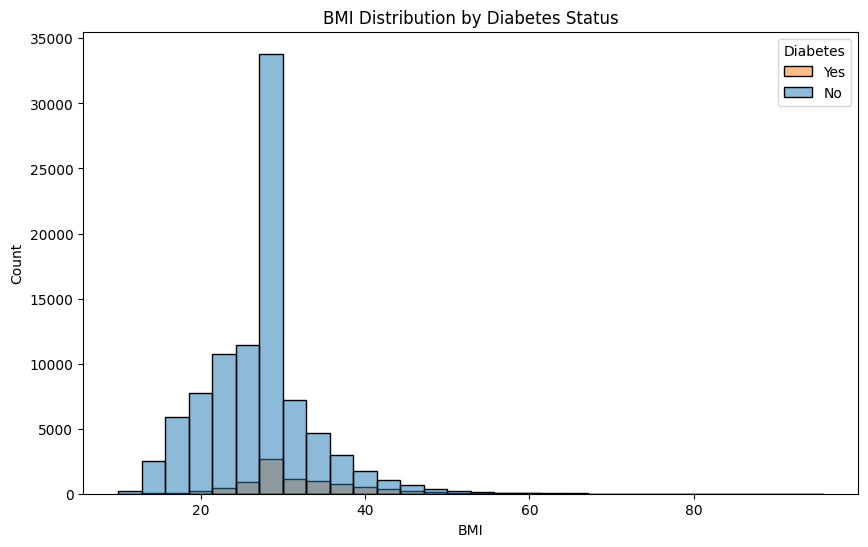

In [ ]:
# Histogram of BMI by Diabetes Status
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='bmi', hue='diabetes', bins=30)
plt.title("BMI Distribution by Diabetes Status")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.legend(title="Diabetes", labels=["Yes", "No"])
plt.show()

This histogram shows the distribution of BMI values for diabetics and non-diabetics. Non-diabetics are more concentrated in the lower BMI range, while diabetics are concentrated slightly to the right. This indicates that diabetics generally have higher BMIs and are generally more likely to be overweight. This suggests that a higher BMI is associated with an higher likelihood of diabetes.

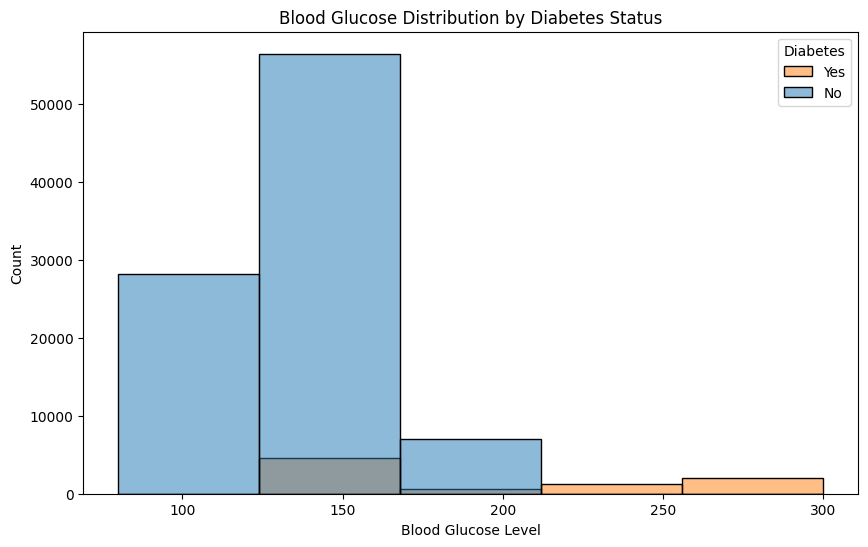

In [ ]:
# Histogram of Blood Glucose by Diabetes Status
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='blood_glucose_level', hue='diabetes', bins=5)
plt.title("Blood Glucose Distribution by Diabetes Status")
plt.xlabel("Blood Glucose Level")
plt.ylabel("Count")
plt.legend(title="Diabetes", labels=["Yes", "No"])
plt.show()

This histogram shows the distribution of blood glucose levels for diabetics and non-diabetics. The distribution for non-diabetics is generally more concentrated at lower blood glucose levels, while the distribution for diabetics is generally more concentrated at higher blood glucose levels. This suggests that a higher blood glucose is associated with an higher likelihood of diabetes.

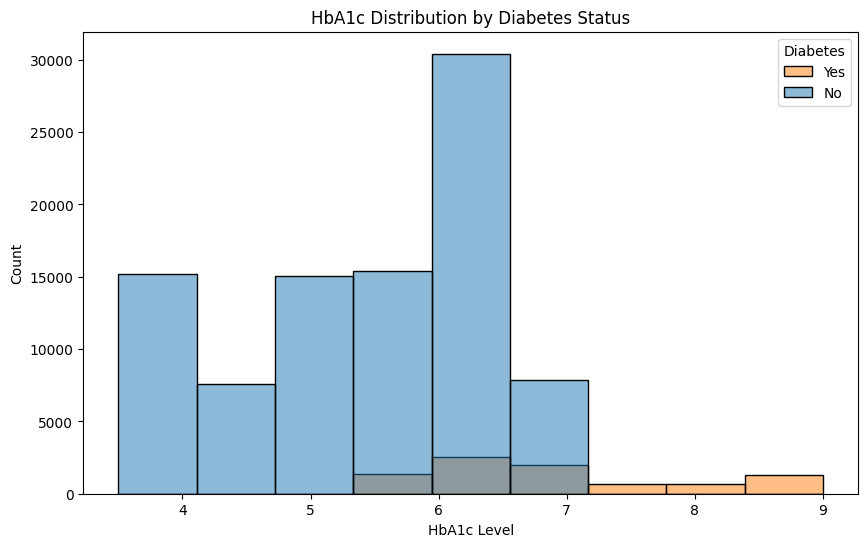

In [ ]:
# Histogram of HbA1c by Diabetes Status
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='HbA1c_level', hue='diabetes', bins=9)
plt.title("HbA1c Distribution by Diabetes Status")
plt.xlabel("HbA1c Level")
plt.ylabel("Count")
plt.legend(title="Diabetes", labels=["Yes", "No"])
plt.show()

This histogram shows the distribution of HbA1c levels for for diabetics and non-diabetics. Non-diabetics are generally concentrated at lower HbA1c values, while diabetics are generally concentrated at higher HbA1c values. This suggests that a HbA1c level is associated with an higher likelihood of diabetes.

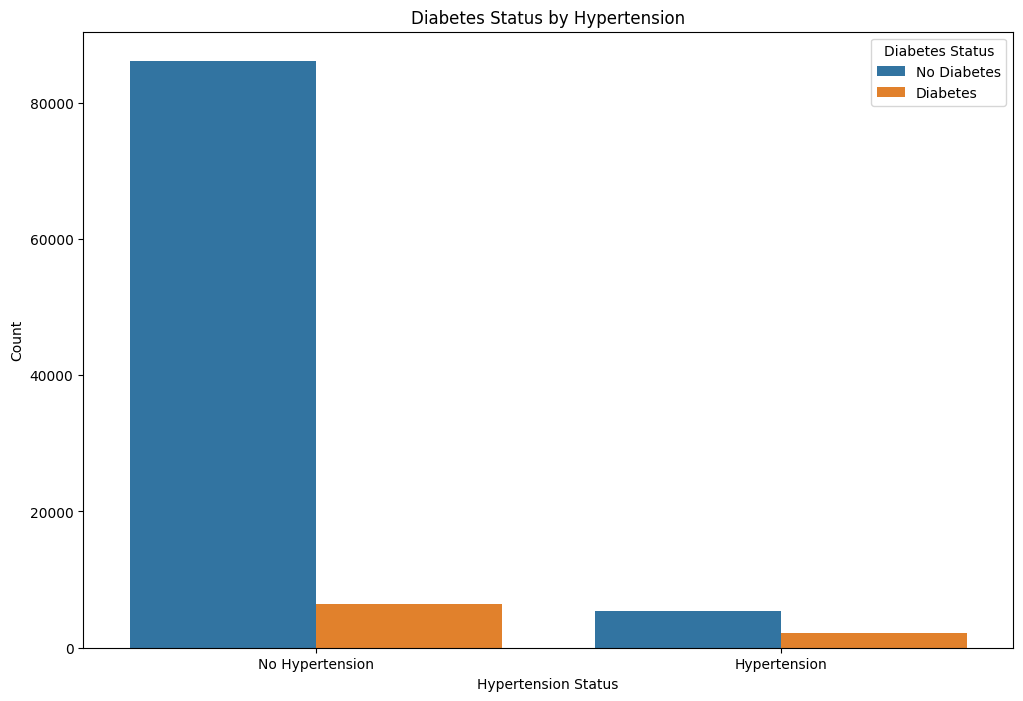

In [ ]:
# Bar Graph of Hypertension by Diabetes Status
df['diabetes_label'] = df['diabetes'].map({0: 'No Diabetes', 1: 'Diabetes'})
df['hypertension_label'] = df['hypertension'].map({0: 'No Hypertension', 1: 'Hypertension'})

plt.figure(figsize=(12,8))
sns.countplot(data=df, x="hypertension_label", hue="diabetes_label")
plt.title("Diabetes Status by Hypertension")
plt.xlabel("Hypertension Status")
plt.ylabel("Count")
plt.legend(title="Diabetes Status")
plt.show()

This graph compares diabetes outcomes between individuals with and without hypertension. Among the majority of individuals without hypertension, most are non-diabetic. Among the minority of individuals with hypertension there appears to be a larger proportion of diabetes cases. This suggests an association between hypertension  and diabetes, where individuals with hypertension are more likely to have diabetes than those without hypertension.

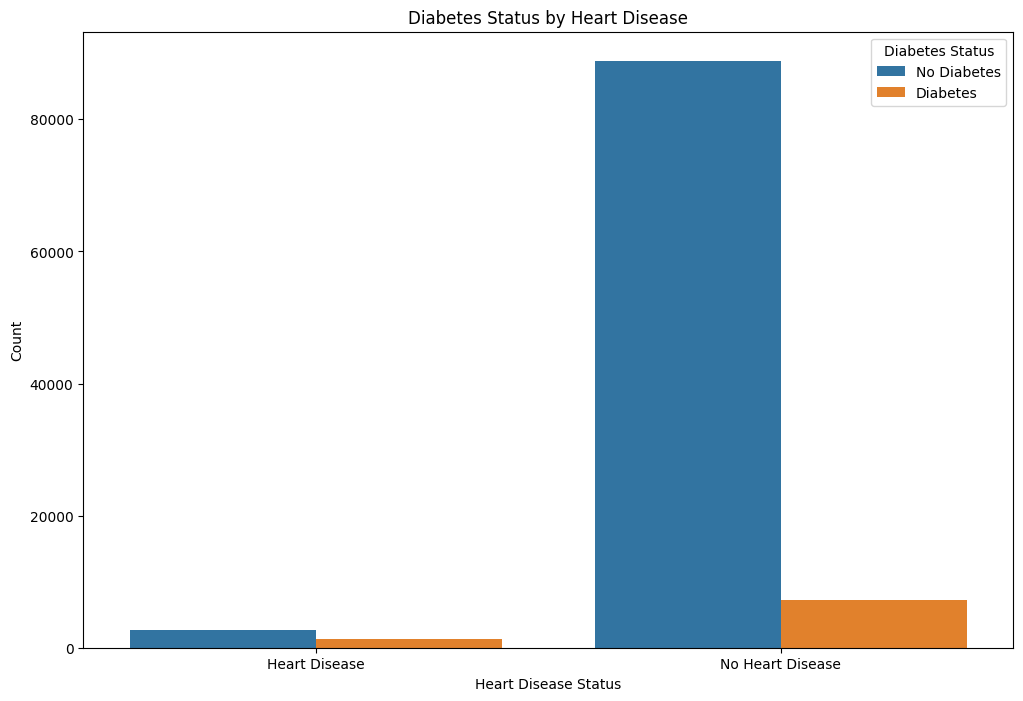

In [ ]:
# Bar Graph of Heart Disease by Diabetes Status
df['heart_disease_label'] = df['heart_disease'].map({0: 'No Heart Disease', 1: 'Heart Disease'})
df['diabetes_label'] = df['diabetes'].map({0: 'No Diabetes', 1: 'Diabetes'})

plt.figure(figsize=(12,8))
sns.countplot(data=df, x="heart_disease_label", hue="diabetes_label")
plt.title("Diabetes Status by Heart Disease")
plt.xlabel("Heart Disease Status")
plt.ylabel("Count")
plt.legend(title="Diabetes Status")
plt.show()

This graph compares diabetes outcomes between individuals with and without heart disease. Among the majority of individuals without heart disease, most are non-diabetic. Among the minority of individuals with heart disease there appears to be a larger proportion of diabetes cases. This suggests an association between heart disease and diabetes, where individuals with heart disease are more likely to have diabetes than those without heart disease.

## Section 4: Sickit decision tree & Evaluation

In [ ]:
# Using scikit-learn linear regression to train, test and predict a target variable
# Pick desired x columns
xcols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level',
         'hypertension', 'heart_disease']
ycol = ['diabetes']

# Drop rows with missing values to clean model dataset
df_ml = df[xcols + ycol].dropna()

# Subset the response and predictor variables
X = df_ml[xcols]
y = df_ml[ycol]

# Split the model into training and testing data
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.30, random_state=10)

# Check split data size
print("Shape of training and testing data:", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Shape of training and testing data: (70000, 6) (30000, 6) (70000, 1) (30000, 1)


In [ ]:
# Create the decision tree model
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth= 10, random_state=10)
# Train the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=10)

In [ ]:
# Predictions
y_pred = dt_model.predict(X_test)
print(y_pred[:10])

[0 0 0 1 0 0 0 0 1 0]


In [ ]:
# Predict the class probability of the test data
y_proba = dt_model.predict_proba(X_test)
print(y_proba[:10])

[[1.         0.        ]
 [1.         0.        ]
 [0.88760064 0.11239936]
 [0.45454545 0.54545455]
 [0.99884593 0.00115407]
 [1.         0.        ]
 [0.98603152 0.01396848]
 [1.         0.        ]
 [0.         1.        ]
 [0.99468977 0.00531023]]


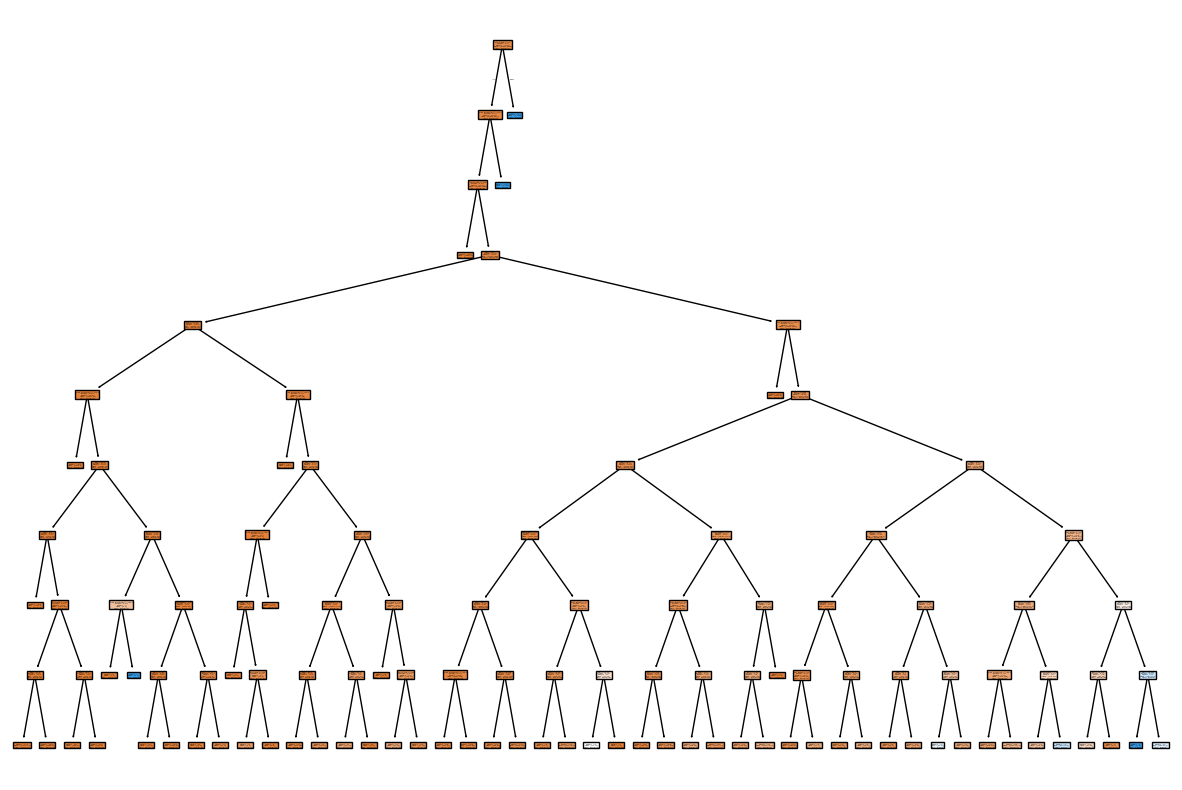

In [ ]:
# Plot the tree with tree.plot_tree after the training
class_names = ['No Diabetes', 'Diabetes']
plt.figure(figsize=(15, 10))
sk.tree.plot_tree(decision_tree=dt_model, feature_names=X_train.columns, class_names=class_names, filled=True, max_depth=10)
plt.show()

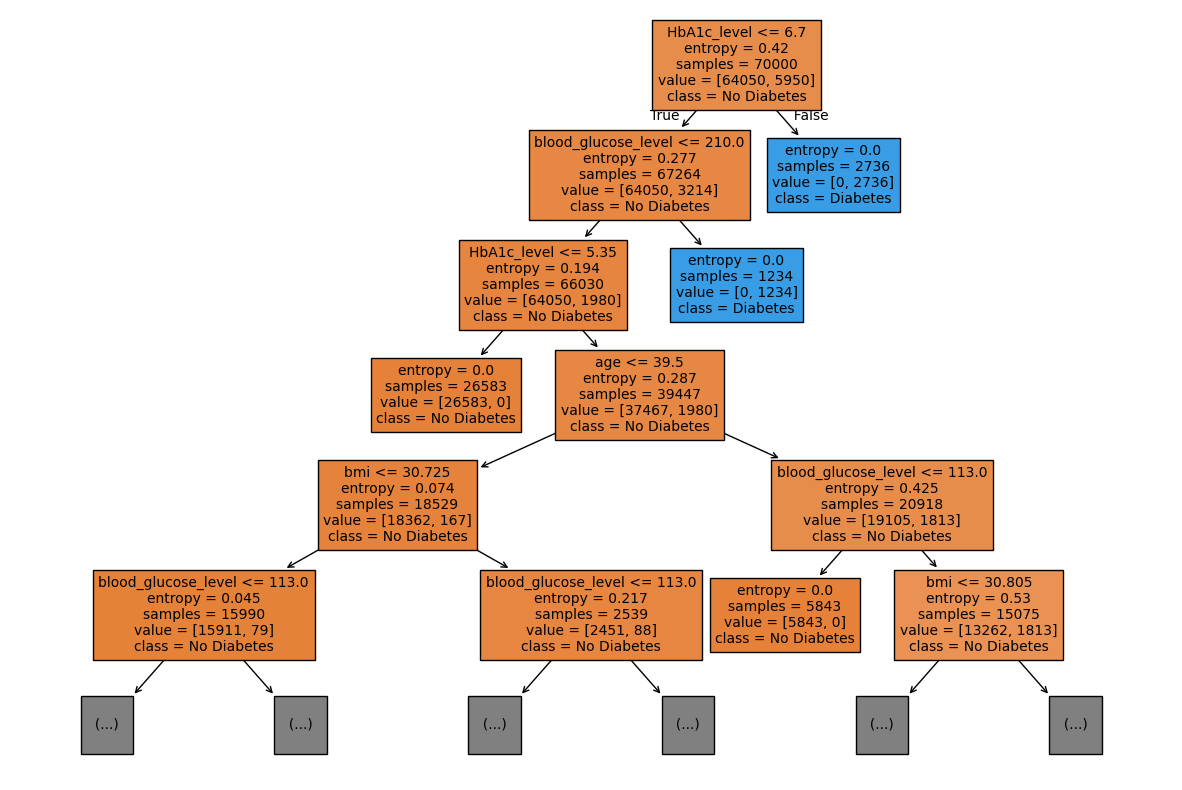

In [ ]:
plt.figure(figsize=(15, 10))
sk.tree.plot_tree(decision_tree=dt_model, feature_names=X_train.columns, class_names=class_names, filled=True, max_depth=5, fontsize=10)
plt.show()

###Interpreting the Decision Tree

Using the test data, the decision tree produced class and probability predictions for each of the first 10 individuals. The first ten predicted classes were [0 0 0 1 0 0 0 0 1 0], where 0 represents no diabetes and 1 represents diabetes, meaning that the model predicts the 4th and 9th individuals to have diabetes (the same result as project 2, which is to be expected because we used the same random state for projects 2 and 3 (random_state=10)). The probability predictions provide additional insight into how confident the model is in the output for each individual. The probability output [1, 0] for the first individual shows that the model is completely confident this individual does not have diabetes. Likewise the ninth individual has probabilities of [0, 1] meaning that the model is completely confident this individual does have diabetes. While the probability output of [0.45, 0.54] for the fourth individual means that the model predicts with a 54.5% probability that individual four has diabetes.

The decision tree begins with what it determined was the most important health factor (HbA1c level), which was split at a 6.7 HbA1c level that the model determined was a cutoff to separate diabetics from non-diabetics. The model then determined the next most  important health factor (blood glucose level), which was split at a blood glucose of 210, the model determined that this was another cutoff to separate diabetics from non-diabetics. The models use HbA1c level and blood glucose level across multiple levels means that the model determined that those particular factors have very strong predictive power. The model also determined that age and BMI were important health factors as well. Overall because the decision tree model reaches confident conclusions after splitting the HbA1c and blood glucose levels we can conclude that they are the most important factors in determining whether an individual will be diabetics or non-diabetics.

In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.9718666666666667


In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[27407    43]
 [  801  1749]]


In [ ]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     27450
           1       0.98      0.69      0.81      2550

    accuracy                           0.97     30000
   macro avg       0.97      0.84      0.90     30000
weighted avg       0.97      0.97      0.97     30000



###Interpreting the meaning of the scores & evaluating the model

The decision tree model show strong overall performance in predicting diabetes, with an accuracy score of 0.9719, which means it correctly identified 97.19% of the cases in the test dataset. The classification report shows that the model performed well for non-diabetics (0), with a precision of 0.97 and a recall of 1, meaning that it nearly always identifies non-diabetics correctly and very rarely produces false positives. For diabetics (1), the model maintains a high precision of 0.98, meaning that when it predicts diabetes, it is usually correct. However, the recall is only 0.69, showing that the model still misses a significant portion of real diabetes cases. This is reflected in the confusion matrix: out of 27450 non-diabetics, the model correctly classified 27407 as non-diabetic with only 43 false positives, while among the 2550 diabetics, it correctly identified 1749 true positives but produced false negatives for 801 diabetes cases. The F1-scores further highlight this pattern, with a score of 0.98 for non-diabetics and a lower 0.81 for diabetics, indicating that while the model is generally accurate it has trouble predicting all real diabetes cases.

## Section 5: Conclusion

In conclusion, the decision tree model showed strong overall performance and confidence in predicting diabetes. This is reinforced by the model's accuracy score (97.19%), meaning that the model correctly classified most of individuals in the test dataset, along with generally high confidence in most of its probability predictions. While the model preformed well at identifying non-diabetics and produced very few false positives (43), it still produced a significant amount of false negatives (801). Overall however the decision tree model effectively classified most individuals correctly and determined that HbA1c and blood glucose levels were the most important factor in predicting if an individual would be a diabetic or non-diabetic.